#  Analyzing CIA Factbook Data Using SQLite and Python

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. You can download the SQLite database, factbook.db, from [this GitHub repository.](https://github.com/factbook/factbook.sql/releases)

## 1. Overview of the Data

In [2]:
import sqlite3
import pandas as pd

Return information on the tables in the database using pandas:

In [3]:
conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type = 'table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


If we had used the default sqlite3 querying method, we would have gotten back nested tuples:

In [10]:
conn.execute(q).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

Showing the first 5 rows of the facts table in the database:

In [9]:
first_5 = "SELECT * FROM FACTS LIMIT 5"
pd.read_sql_query(first_5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## 2. Summary Statistics

In [12]:
sum_stat = """
SELECT min(population) min_pop, max(population) max_pop, min(population_growth) min_pop_growth, max(population_growth) max_pop_growth
FROM facts
"""
pd.read_sql_query(sum_stat, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


## 3. Exploring Outliers

In [13]:
#the countrie(s) with a population of 0.
pop_0 = "SELECT name FROM facts WHERE population = 0"
pd.read_sql_query(pop_0, conn)

,name
0,Antarctica


We can see that the country with 0 population is Antartica. In the Factbook page for [Antartica](https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html), it said that Antartika doesn't have indigenous inhabitants, but there are both permanent and summer-only staffed research stations.


In [14]:
#the countrie(s) with a population of 0.
pop_max = "SELECT name FROM facts WHERE population = 7256490011"
pd.read_sql_query(pop_max, conn)

,name
0,World


We can see that country that has 7256490011 population is World. It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion.

## 4. Histogram

We will make some histograms for the rest of the countries in the table, ignoring the 2 outlier rows.

C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215D0B340F0>,
      dtype=object)

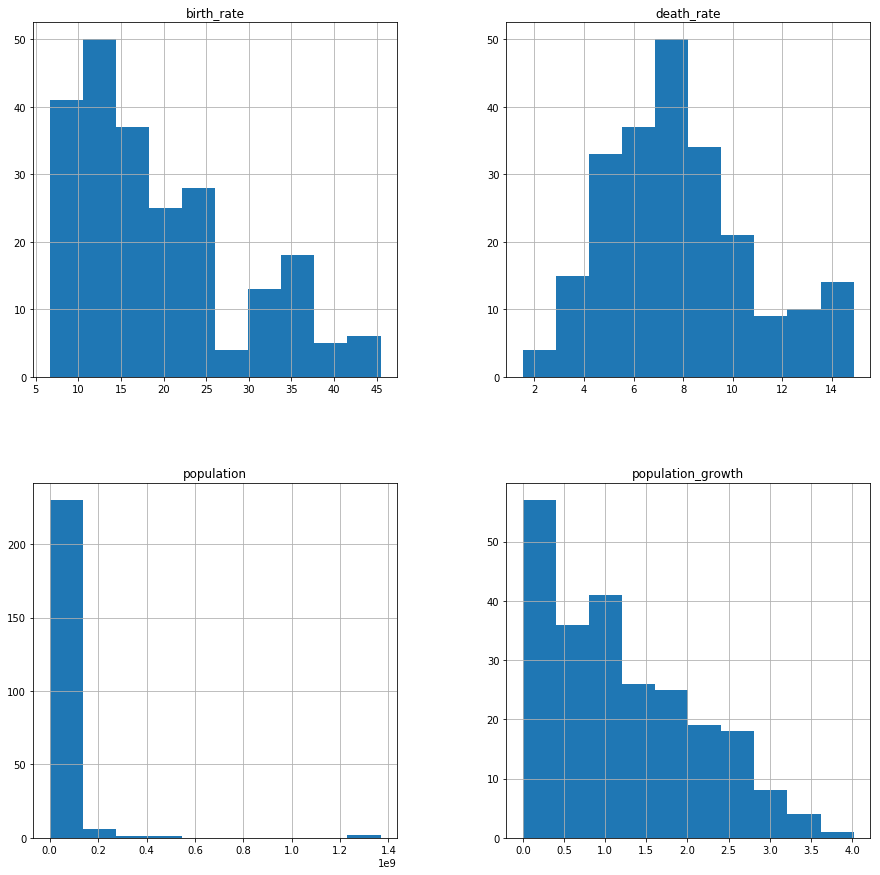

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

querys = """
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population NOT IN (0,7256490011)
"""
pd.read_sql_query(querys, conn).hist(ax=ax)

## 5. Countries with the highest population density

Population density is the ratio of population to land area.

In [34]:
pop_density = "SELECT name, cast(population as float)/cast(area_land as float) pop_density FROM facts ORDER BY pop_density DESC"
pd.read_sql_query(pop_density, conn)

,name,pop_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


From the result above we can see that 5 countries with the highest population density is Macau, Monaco, Singapore, Hongkong, and Gaza Strip. Below is the histogram of population densities for all country.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215D0D35710>]],
      dtype=object)

<Figure size 1080x1080 with 0 Axes>

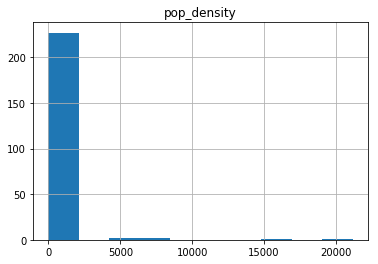

In [37]:
fig = plt.figure(figsize=(15,15))

pd.read_sql_query(pop_density, conn).hist()

## 6. Countries with the highest ratios of water to land

In [38]:
ratio_water_land = "SELECT name, cast(area_water as float)/cast(area_land as float) ratio_water_to_land FROM facts ORDER BY ratio_water_to_land DESC"
pd.read_sql_query(ratio_water_land, conn)

,name,ratio_water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


Countrie have more water than land:

In [40]:
more_water = "SELECT name, cast(area_water as float)/cast(area_land as float) ratio_water_to_land FROM facts WHERE ratio_water_to_land>1"
pd.read_sql_query(more_water, conn)

,name,ratio_water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231


In [4]:
conn.close()